In [5]:
import datajoint as dj

In [6]:
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'

In [7]:
dj.config.save_local()

In [8]:
schema = dj.Schema('universityofstthomas')

[2023-09-26 22:33:28,709][INFO]: Connecting root@127.0.0.1:3306
[2023-09-26 22:33:28,735][INFO]: Connected root@127.0.0.1:3306


In [9]:
@schema
class Department(dj.Manual):
    definition = """
    dept_id: char(4)
    ---
    dep_name: varchar(10)
    """

In [10]:
@schema
class Student(dj.Manual):
    definition = """
    stud_id :    int
    ---
    first_name :    varchar(20)
    last_name :     varchar(20)
    date_of_birth : DATE
    student_email:  varchar(30)
    -> Department
    """

In [11]:
@schema
class Course(dj.Manual):
    definition = """
    course_id :    smallint unsigned
    ---
    course_name :  varchar(30)
    course_desc :  varchar(60)
    -> Student
    -> Department

"""   

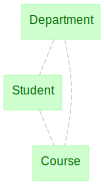

In [12]:
dj.Diagram(schema)

In [13]:
@schema
class StudentGrade(dj.Manual):
    definition = """
        -> Student
        assign_number : smallint
        ---
        grade :  DECIMAL(6, 2)
        -> Course
    """

In [14]:
@schema
class StudentGradesCourse(dj.Manual):
    definition = """
        -> Course
        -> StudentGrade
    """


In [15]:
@schema
class BostonMarathonChampion(dj.Manual):
    definition = """
     marathon_id:     int
    ---
    marathon_name : varchar(30)
    gender :        enum('MEN','WOMEN')
    nationality :   varchar(30)
    year :    YEAR
    """

In [16]:
@schema
class USState(dj.Manual):
    definition = """
    state_id :         smallint
    ---
    state_capitals : varchar(20)
    state_birds :    varchar(20)
    state_flowers :  varchar(20)
    """

In [17]:
@schema
class HTMLColors(dj.Manual):
    definition = """
    htmlcolor_name :   varchar(10)
    ---
    red_value :        smallint
    green_value :      smallint
    blue_value :       smallint
    """

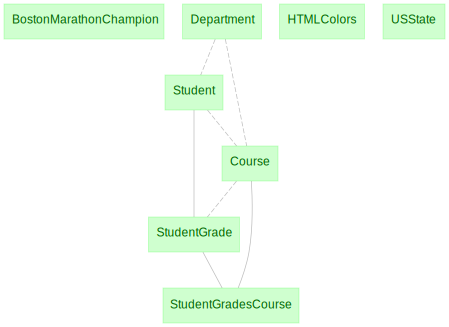

In [18]:
dj.Diagram(schema)

In [19]:
Department.insert1(("MATH", "mathematic"))

In [20]:

from faker import Faker
faker = Faker()

In [23]:
Student.insert1((1, faker.first_name(), faker.last_name(), faker.date_of_birth(), faker.email(), "MATH")) 

In [24]:
Student()

stud_id,first_name,last_name,date_of_birth,student_email,dept_id
1,Barbara,Maldonado,1973-05-28,stephenbrady@example.org,MATH


In [45]:
Course.insert1((1, "Big_data", "The tools and techniques of managing and analyzing big data", "1", "MATH"))

In [46]:
Course()

course_id,course_name,course_desc,stud_id,dept_id
1,Big_data,The tools and techniques of managing and analyzing big data,1,MATH


In [68]:
USState.insert1((1, "TX", "Austin", "Bluebonnet"))

In [69]:
USState()

state_id,state_capitals,state_birds,state_flowers
1,TX,Austin,Bluebonnet


In [71]:
BostonMarathonChampion.insert1((1, "Evans Chebet", "men", "Kenya", 2023))

In [72]:
BostonMarathonChampion()

marathon_id,marathon_name,gender,nationality,year
1,Evans Chebet,MEN,Kenya,2023
